Sütun Açıklamaları:
* Country - Ülke adı

* Year - Yıl (2000-2024)

* Total Water Consumption (Billion Cubic Meters) - Toplam Su Tüketimi (Milyar Metreküp)

* Per Capita Water Use (Liters per Day) - Kişi Başına Su Kullanımı (Litre/Gün)

* Agricultural Water Use (%) - Tarımsal Su Kullanım Oranı (%)

* Industrial Water Use (%) - Endüstriyel Su Kullanım Oranı (%)

* Household Water Use (%) - Evsel Su Kullanım Oranı (%)

* Rainfall Impact (Annual Precipitation in mm) - Yağış Etkisi (Yıllık Yağış Miktarı - mm)

* Groundwater Depletion Rate (%) - Yeraltı Suyu Tükenme Oranı (%)

* Water Scarcity Level - Su Kıtlığı Seviyesi (Low, Moderate, High)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("cleaned_global_water_consumption.csv")
data.head()

,Country,Year,Total Water Consumption (Billion Cubic Meters),Per Capita Water Use (Liters per Day),Agricultural Water Use (%),Industrial Water Use (%),Household Water Use (%),Rainfall Impact (Annual Precipitation in mm),Groundwater Depletion Rate (%),Water Scarcity Level
0,Argentina,2000,481.490000,235.431429,48.550000,20.844286,30.100000,1288.698571,3.255714,Moderate
1,Argentina,2001,455.063000,299.551000,48.465000,26.943000,22.550000,1371.729000,3.120000,Moderate
2,Argentina,2002,482.749231,340.124615,50.375385,29.042308,23.349231,1590.305385,2.733846,Moderate
3,Argentina,2003,452.660000,326.756667,49.086667,30.476000,24.440000,1816.012667,2.708000,Moderate
4,Argentina,2004,634.566000,230.346000,38.670000,36.670000,23.924000,815.998000,1.902000,Moderate


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         500 non-null    object 
 1   Year                                            500 non-null    int64  
 2   Total Water Consumption (Billion Cubic Meters)  500 non-null    float64
 3   Per Capita Water Use (Liters per Day)           500 non-null    float64
 4   Agricultural Water Use (%)                      500 non-null    float64
 5   Industrial Water Use (%)                        500 non-null    float64
 6   Household Water Use (%)                         500 non-null    float64
 7   Rainfall Impact (Annual Precipitation in mm)    500 non-null    float64
 8   Groundwater Depletion Rate (%)                  500 non-null    float64
 9   Water Scarcity Level                       

In [8]:
data.isnull().sum()

Country                                           0
Year                                              0
Total Water Consumption (Billion Cubic Meters)    0
Per Capita Water Use (Liters per Day)             0
Agricultural Water Use (%)                        0
Industrial Water Use (%)                          0
Household Water Use (%)                           0
Rainfall Impact (Annual Precipitation in mm)      0
Groundwater Depletion Rate (%)                    0
Water Scarcity Level                              0
dtype: int64

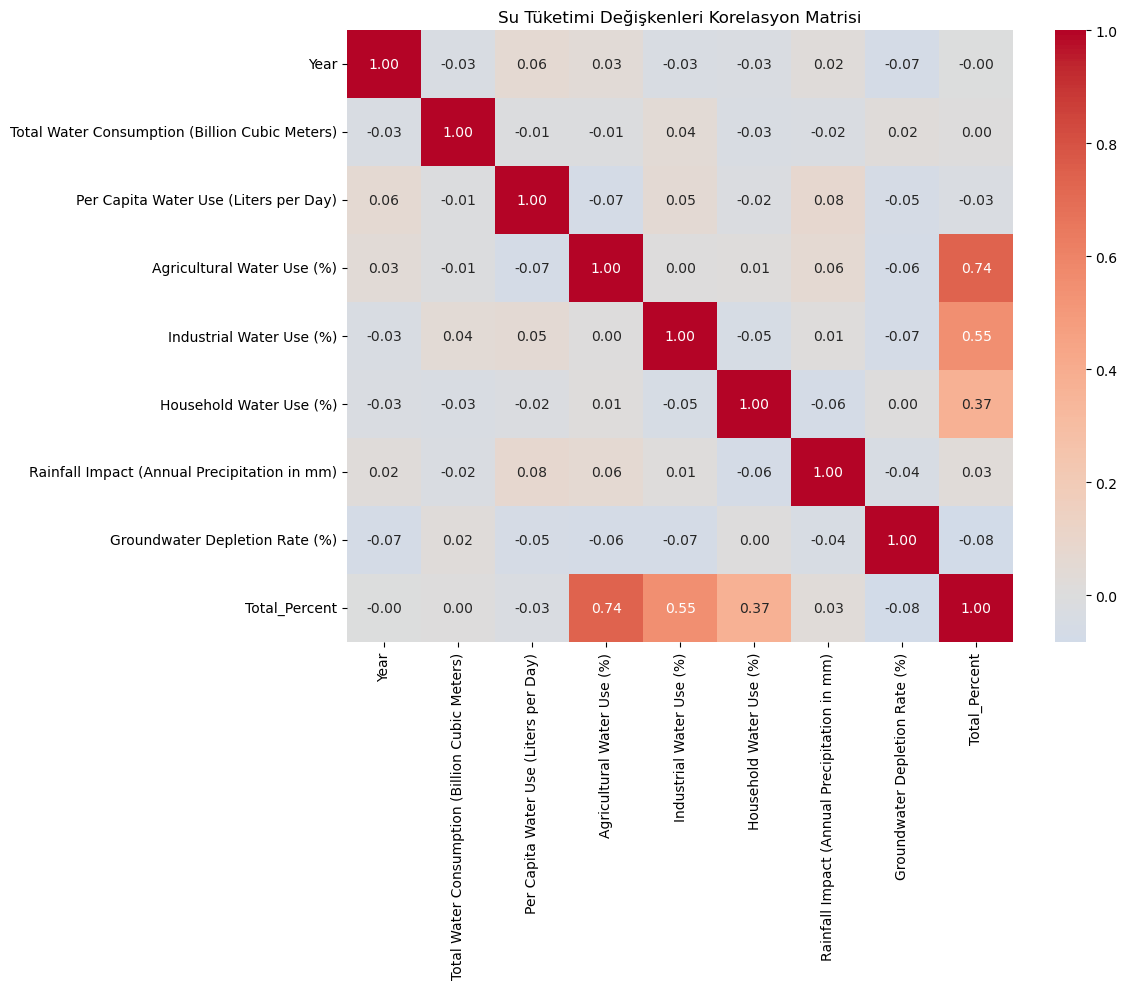

In [ ]:
# Korelasyon matrisi
numeric_columns = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Su Tüketimi Değişkenleri Korelasyon Matrisi')
plt.tight_layout()
plt.show()

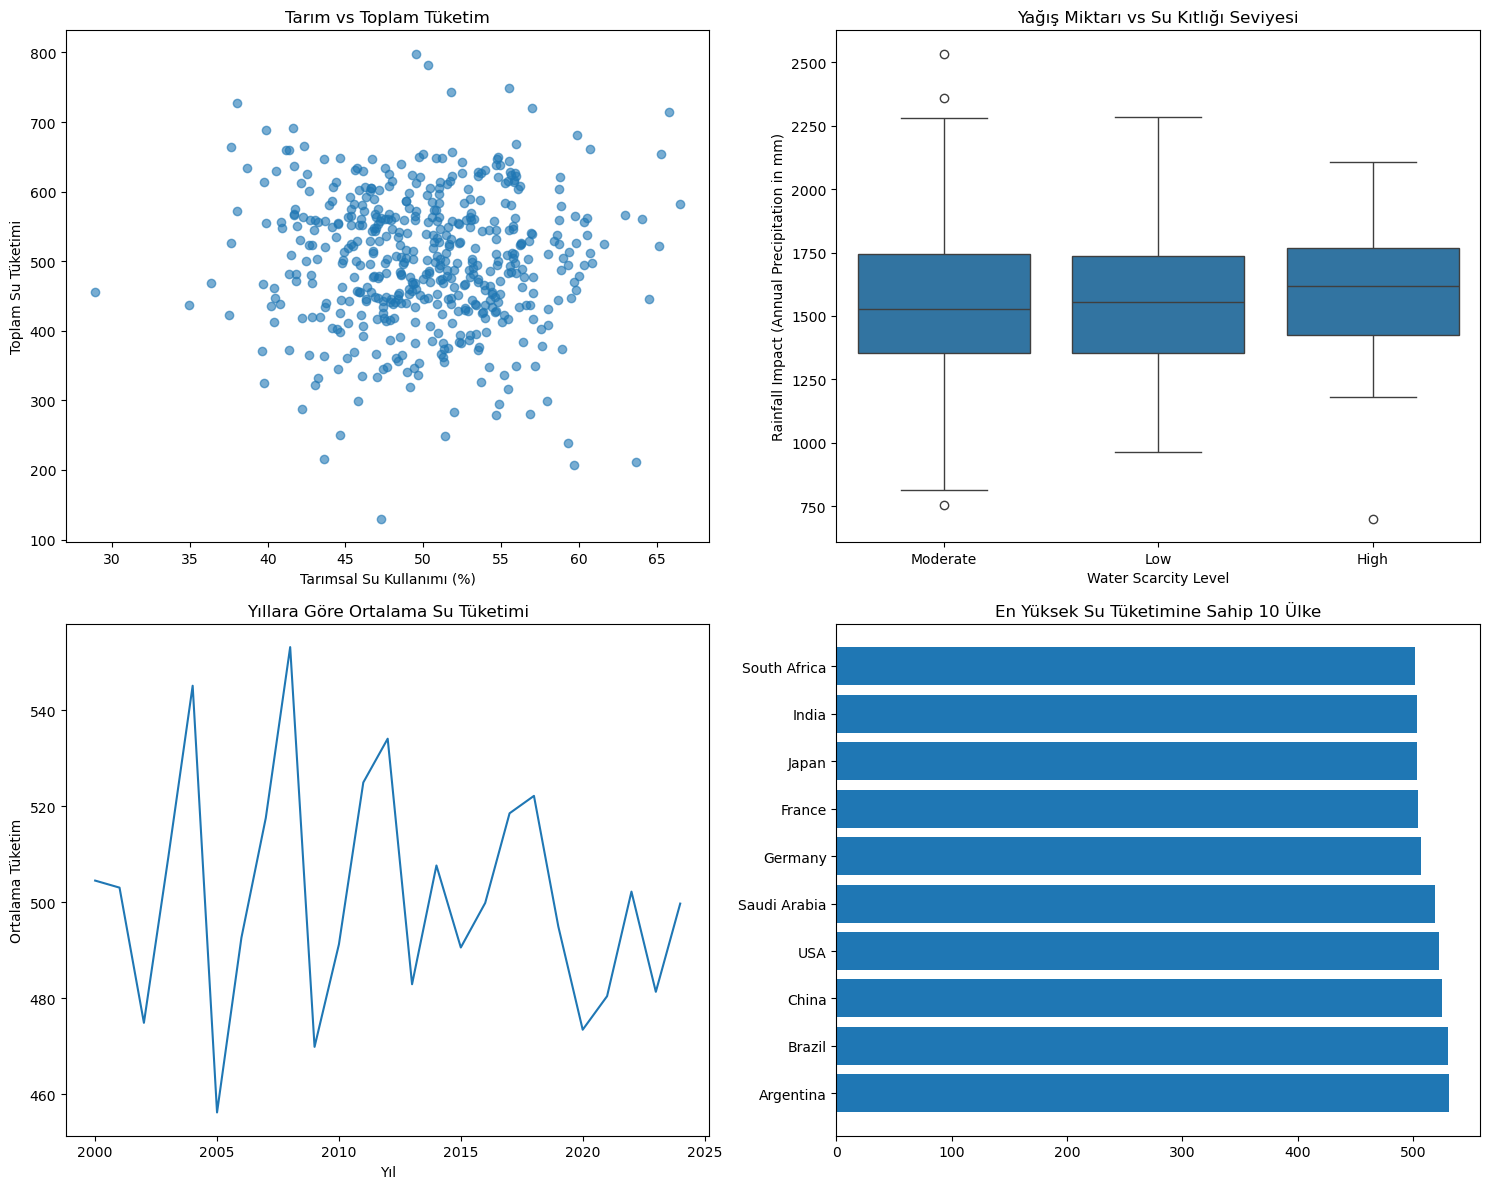

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Tarımsal kullanım vs Toplam tüketim
axes[0,0].scatter(data['Agricultural Water Use (%)'], 
                  data['Total Water Consumption (Billion Cubic Meters)'], alpha=0.6)
axes[0,0].set_xlabel('Tarımsal Su Kullanımı (%)')
axes[0,0].set_ylabel('Toplam Su Tüketimi')
axes[0,0].set_title('Tarım vs Toplam Tüketim')

# Yağış vs Su Kıtlığı
sns.boxplot(data=data, x='Water Scarcity Level', y='Rainfall Impact (Annual Precipitation in mm)', ax=axes[0,1])
axes[0,1].set_title('Yağış Miktarı vs Su Kıtlığı Seviyesi')

# Zaman içinde trendler
yearly_avg = data.groupby('Year').mean(numeric_only=True)
axes[1,0].plot(yearly_avg.index, yearly_avg['Total Water Consumption (Billion Cubic Meters)'])
axes[1,0].set_title('Yıllara Göre Ortalama Su Tüketimi')
axes[1,0].set_xlabel('Yıl')
axes[1,0].set_ylabel('Ortalama Tüketim')

# Ülke karşılaştırması
country_avg = data.groupby('Country').mean(numeric_only=True).sort_values('Total Water Consumption (Billion Cubic Meters)', ascending=False)
axes[1,1].barh(country_avg.index[:10], country_avg['Total Water Consumption (Billion Cubic Meters)'][:10])
axes[1,1].set_title('En Yüksek Su Tüketimine Sahip 10 Ülke')

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Global Toplam Su Tüketimi (2000-2024)'}, xlabel='Year', ylabel='Billion m³'>

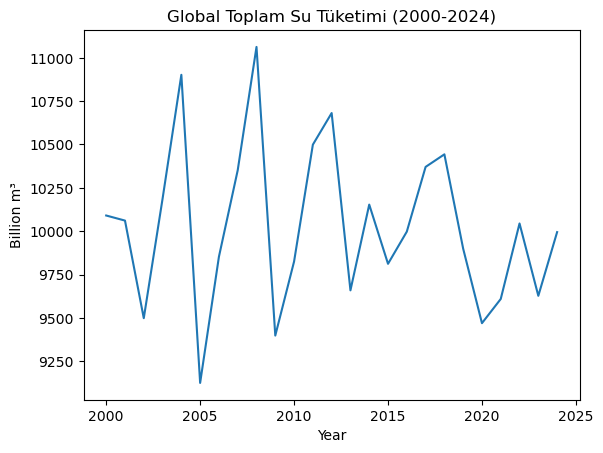

In [10]:
yearly_total = data.groupby("Year")["Total Water Consumption (Billion Cubic Meters)"].sum()
yearly_total.plot(kind="line", title="Global Toplam Su Tüketimi (2000-2024)", ylabel="Billion m³")


<Axes: title={'center': 'Kişi Başı Günlük Su Kullanımı'}, xlabel='Year', ylabel='Litre/Gün'>

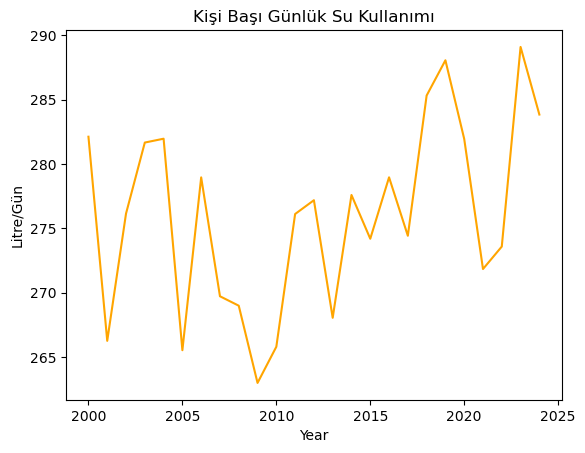

In [12]:
yearly_per_capita = data.groupby("Year")["Per Capita Water Use (Liters per Day)"].mean()
yearly_per_capita.plot(kind="line", color="orange", title="Kişi Başı Günlük Su Kullanımı", ylabel="Litre/Gün")


<Axes: title={'center': 'Su Kullanım Alanlarının Zaman İçinde Değişimi'}, xlabel='Year'>

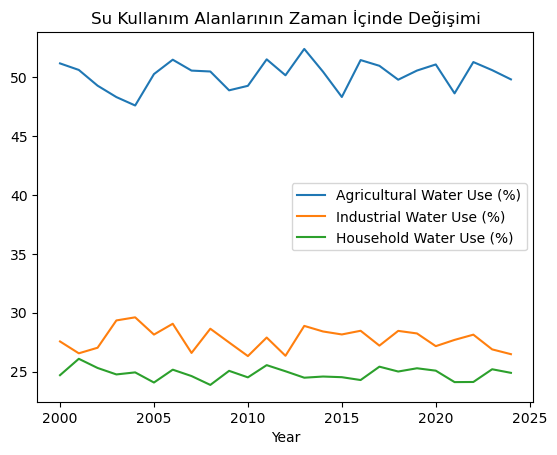

In [14]:
usage_means = data.groupby("Year")[["Agricultural Water Use (%)","Industrial Water Use (%)","Household Water Use (%)"]].mean()
usage_means.plot(kind="line", title="Su Kullanım Alanlarının Zaman İçinde Değişimi")


In [ ]:
#Aşırı yüksek/ düşük tüketim görülen ülke/yıllar 
q1 = data["Total Water Consumption (Billion Cubic Meters)"].quantile(0.25)
q3 = data["Total Water Consumption (Billion Cubic Meters)"].quantile(0.75)
iqr = q3 - q1
outliers = data[(data["Total Water Consumption (Billion Cubic Meters)"] < q1 - 1.5*iqr) |
              (data["Total Water Consumption (Billion Cubic Meters)"] > q3 + 1.5*iqr)]

outliers


,Country,Year,Total Water Consumption (Billion Cubic Meters),Per Capita Water Use (Liters per Day),Agricultural Water Use (%),Industrial Water Use (%),Household Water Use (%),Rainfall Impact (Annual Precipitation in mm),Groundwater Depletion Rate (%),Water Scarcity Level
48,Australia,2023,207.795000,322.386667,59.688333,40.568333,30.145000,1297.586667,2.510000,Low
56,Brazil,2006,781.342857,236.870000,50.325714,36.270000,27.444286,1818.135714,2.331429,Moderate
81,Canada,2006,748.423333,319.716667,55.503333,43.583333,21.826667,1202.826667,2.540000,Low
104,China,2004,798.418000,332.616000,49.508000,32.036000,26.330000,1494.778000,2.802000,Low
150,Germany,2000,215.224000,294.826000,43.592000,30.644000,28.184000,1112.872000,3.100000,Moderate
159,Germany,2009,129.636667,266.550000,47.276667,29.820000,13.823333,1329.656667,2.166667,Moderate
270,Japan,2020,211.816667,275.443333,63.690000,25.293333,20.760000,2151.440000,1.966667,Moderate
430,Turkey,2005,250.215714,218.234286,44.674286,31.265714,23.634286,1805.707143,1.734286,Moderate
431,Turkey,2006,238.577778,356.633333,59.277778,24.080000,21.277778,1528.036667,3.268889,Low
499,USA,2024,249.485000,186.374000,51.386000,24.769000,27.677000,1771.199000,1.638000,High


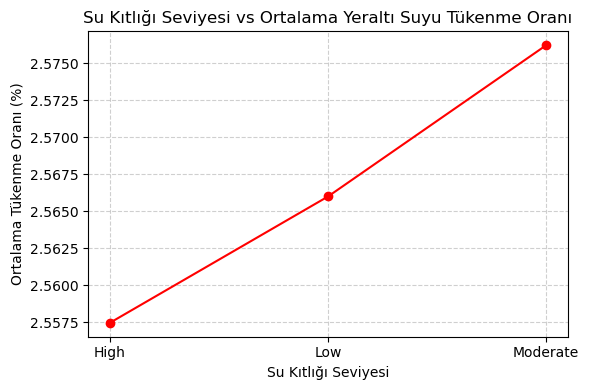

In [ ]:
# Su kıtlığı seviyelerine göre ortalama yeraltı suyu tükenme oranı
scarcity_group = data.groupby("Water Scarcity Level")["Groundwater Depletion Rate (%)"].mean()

plt.figure(figsize=(6, 4))
plt.plot(scarcity_group.index, scarcity_group.values, marker='o', linestyle='-', color='red')
plt.title("Su Kıtlığı Seviyesi vs Ortalama Yeraltı Suyu Tükenme Oranı")
plt.ylabel("Ortalama Tükenme Oranı (%)")
plt.xlabel("Su Kıtlığı Seviyesi")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()




In [3]:
# Yıllara Göre Ortalama Su Tüketimi
avg_yearly_consumption = data.groupby("Year")["Total Water Consumption (Billion Cubic Meters)"].mean()
print("Yıllara Göre Ortalama Su Tüketimi:\n", avg_yearly_consumption)

Yıllara Göre Ortalama Su Tüketimi:
 Year
2000    504.519100
2001    503.053597
2002    474.905748
2003    509.343787
2004    545.096307
2005    456.237927
2006    492.629057
2007    517.571794
2008    553.138789
2009    469.899052
2010    491.255762
2011    524.952919
2012    534.068243
2013    482.937441
2014    507.666116
2015    490.588866
2016    499.863858
2017    518.534833
2018    522.160902
2019    494.954986
2020    473.466396
2021    480.451297
2022    502.223009
2023    481.360139
2024    499.730829
Name: Total Water Consumption (Billion Cubic Meters), dtype: float64


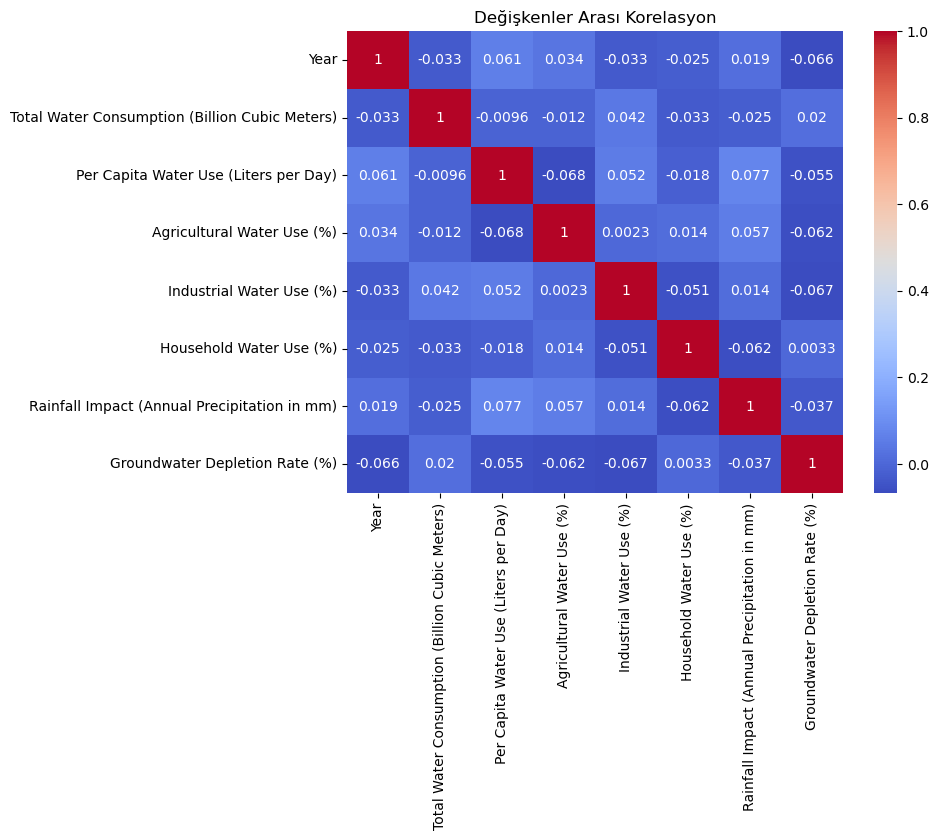

In [5]:
# Korelasyon Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Değişkenler Arası Korelasyon")
plt.show()

In [6]:
# Yağış ile Su Tüketimi Korelasyonu
corr_rain = data["Rainfall Impact (Annual Precipitation in mm)"].corr(data["Per Capita Water Use (Liters per Day)"])
print(f"Yağış - Kişi Başına Su Kullanımı Korelasyonu: {corr_rain:.2f}")

Yağış - Kişi Başına Su Kullanımı Korelasyonu: 0.08


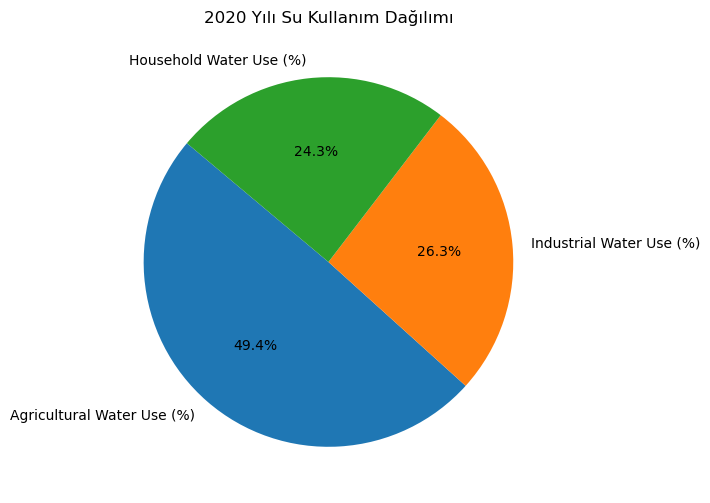

In [7]:
# Pasta Grafiği (2020 yılı sektörel dağılım örneği)
year_2020 = data[data["Year"] == 2020][["Agricultural Water Use (%)", "Industrial Water Use (%)", "Household Water Use (%)"]].mean()
plt.figure(figsize=(6,6))
plt.pie(year_2020, labels=year_2020.index, autopct="%1.1f%%", startangle=140)
plt.title("2020 Yılı Su Kullanım Dağılımı")
plt.show()

In [8]:
# Sektörel Kullanım Dengesi (yıllar içinde ortalama oranlar)
sector_usage = data.groupby("Year")[["Agricultural Water Use (%)", "Industrial Water Use (%)", "Household Water Use (%)"]].mean()
print("Yıllara Göre Ortalama Sektörel Kullanım:\n", sector_usage.head())

Yıllara Göre Ortalama Sektörel Kullanım:
       Agricultural Water Use (%)  Industrial Water Use (%)  \
Year                                                         
2000                   51.153159                 27.564164   
2001                   50.598283                 26.558490   
2002                   49.263433                 27.031613   
2003                   48.295642                 29.348126   
2004                   47.582132                 29.610463   

      Household Water Use (%)  
Year                           
2000                24.702626  
2001                26.092300  
2002                25.314382  
2003                24.766466  
2004                24.939957  


In [10]:
# En Çok Su Tüketen 10 Ülke
top10_countries = data.groupby("Country")["Total Water Consumption (Billion Cubic Meters)"].sum().nlargest(10)
print("En Çok Su Tüketen 10 Ülke:\n", top10_countries)

En Çok Su Tüketen 10 Ülke:
 Country
Argentina       13284.860759
Brazil          13263.287436
China           13133.596733
USA             13058.950844
Saudi Arabia    12966.078679
Germany         12668.588927
France          12596.115707
Japan           12585.683217
India           12581.662785
South Africa    12544.930893
Name: Total Water Consumption (Billion Cubic Meters), dtype: float64


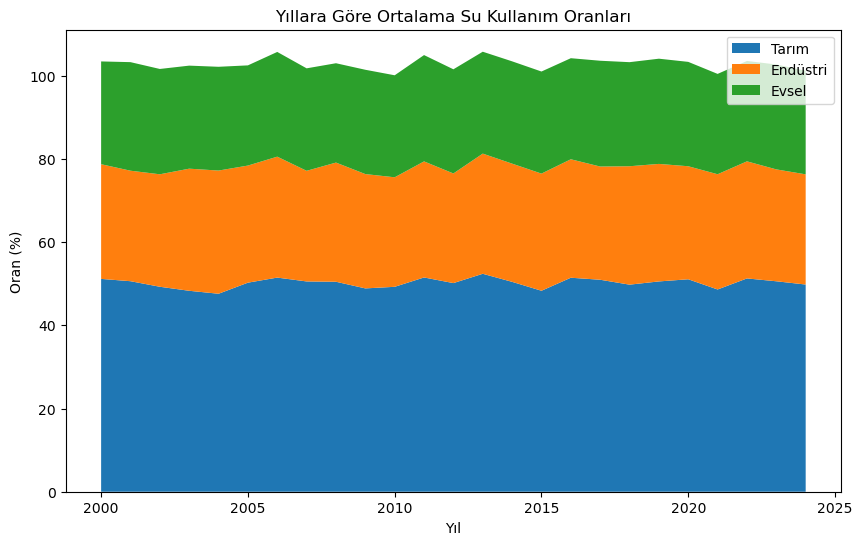

In [14]:
plt.figure(figsize=(10,6))
plt.stackplot(avg_sector_usage.index,
              avg_sector_usage["Agricultural Water Use (%)"],
              avg_sector_usage["Industrial Water Use (%)"],
              avg_sector_usage["Household Water Use (%)"],
              labels=["Tarım", "Endüstri", "Evsel"])
plt.legend(loc="upper right")
plt.title("Yıllara Göre Ortalama Su Kullanım Oranları")
plt.xlabel("Yıl")
plt.ylabel("Oran (%)")
plt.show()


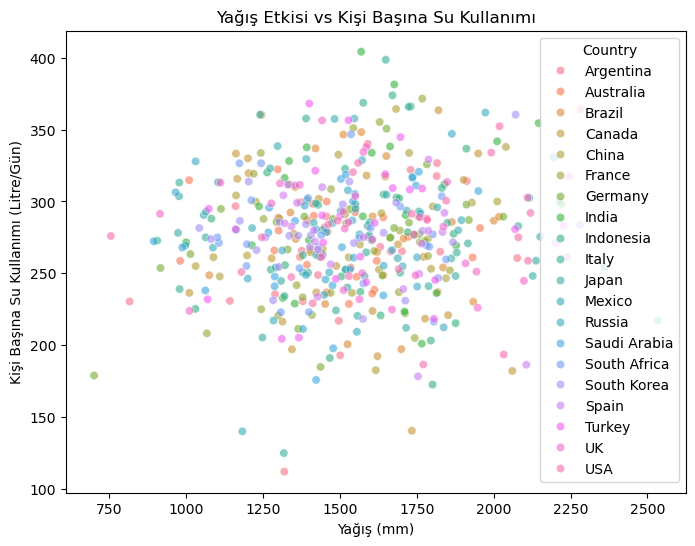

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, 
                x="Rainfall Impact (Annual Precipitation in mm)", 
                y="Per Capita Water Use (Liters per Day)", 
                hue="Country", 
                alpha=0.6)
plt.title("Yağış Etkisi vs Kişi Başına Su Kullanımı")
plt.xlabel("Yağış (mm)")
plt.ylabel("Kişi Başına Su Kullanımı (Litre/Gün)")
plt.show()